# BA820 Project Proposal - Bob Ross Paintings EDA

**Team:** A1 Project M1  
**Section:** A1  
**Date:** January 2026

---

## Overview

This notebook explores the Bob Ross Paintings dataset for our BA820 project. We want to find patterns in how Bob Ross chose colors across 403 paintings from "The Joy of Painting" (1983-1994).

## 1. Setup and Data Loading

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://drive.google.com/uc?export=download&id=17d9X4zUbU4uPD_oEqb0hlnMexbjZcpeR')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

In [227]:
df.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


## 2. Data Prep

In [228]:
color_cols = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow',
              'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
              'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green',
              'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown',
              'Yellow_Ochre', 'Alizarin_Crimson']

color_cols = [c for c in color_cols if c in df.columns]
print(f"Found {len(color_cols)} color columns")

print("Missing values:", df.isnull().sum().sum())

Found 18 color columns
Missing values: 0


## 3. Basic Stats

In [229]:
print("Dataset Overview")
print(f"Total paintings: {len(df)}")
print(f"Seasons: {df['season'].min()}-{df['season'].max()}")
print(f"Colors tracked: {len(color_cols)}")
print(f"\nColors per painting:")
print(f"- Min: {df['num_colors'].min()}")
print(f"- Max: {df['num_colors'].max()}")
print(f"- Mean: {round(df['num_colors'].mean(), 1)}")
print(f"- Median: {df['num_colors'].median()}")

Dataset Overview
Total paintings: 403
Seasons: 1-31
Colors tracked: 18

Colors per painting:
- Min: 1
- Max: 15
- Mean: 10.6
- Median: 11.0


## 4. Color Usage

In [230]:
color_usage = df[color_cols].sum().sort_values(ascending=False)
color_pct = (color_usage / len(df) * 100).round(1)

print("Color Usage:")
for color, pct in color_pct.items():
    print(f"- {color}: {pct}%")

Color Usage:
- Titanium_White: 99.3%
- Alizarin_Crimson: 94.3%
- Van_Dyke_Brown: 92.1%
- Cadmium_Yellow: 85.9%
- Yellow_Ochre: 81.1%
- Phthalo_Blue: 80.1%
- Bright_Red: 79.7%
- Midnight_Black: 78.7%
- Sap_Green: 75.9%
- Indian_Yellow: 72.5%
- Dark_Sienna: 72.0%
- Prussian_Blue: 65.3%
- Phthalo_Green: 28.8%
- Black_Gesso: 25.1%
- Burnt_Umber: 13.6%
- Liquid_Clear: 12.7%
- Liquid_Black: 3.5%
- Indian_Red: 0.2%


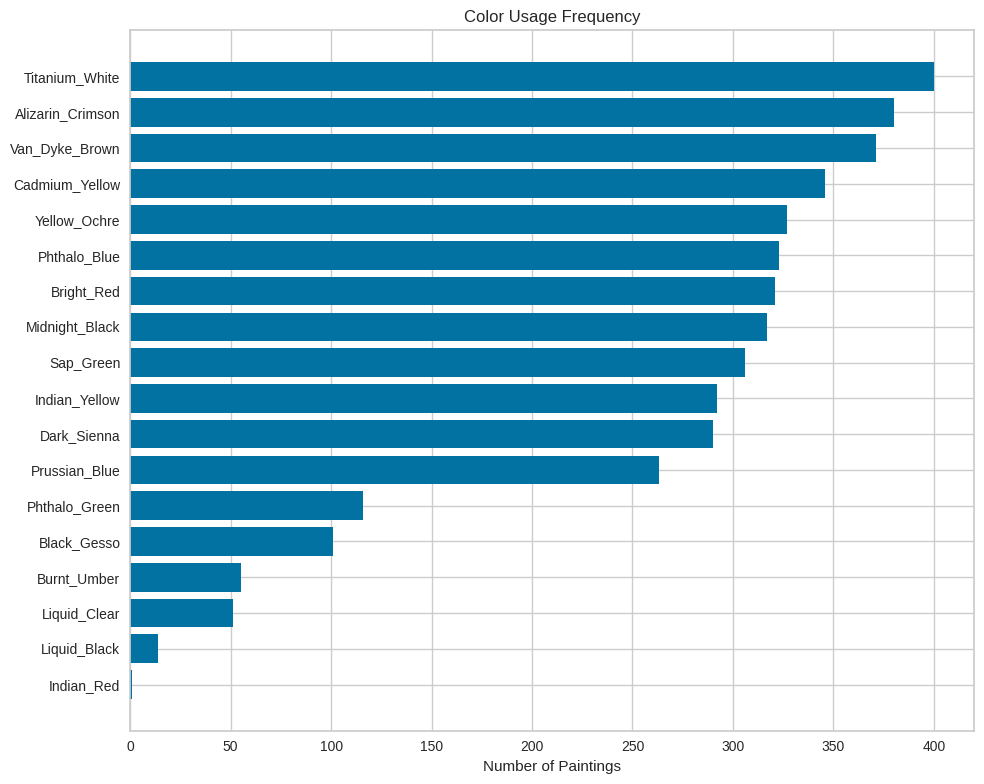

In [231]:
plt.figure(figsize=(10, 8))
colors_sorted = color_usage.sort_values()
plt.barh(range(len(colors_sorted)), colors_sorted.values)
plt.yticks(range(len(colors_sorted)), [colors for colors in colors_sorted.index])
plt.xlabel('Number of Paintings')
plt.title('Color Usage Frequency')
plt.tight_layout()
plt.show()

Titanium White is in almost every painting (99%), along with Alizarin Crimson and Van Dyke Brown. Indian Red is super rare, only 1 painting.

## 5. Palette Complexity

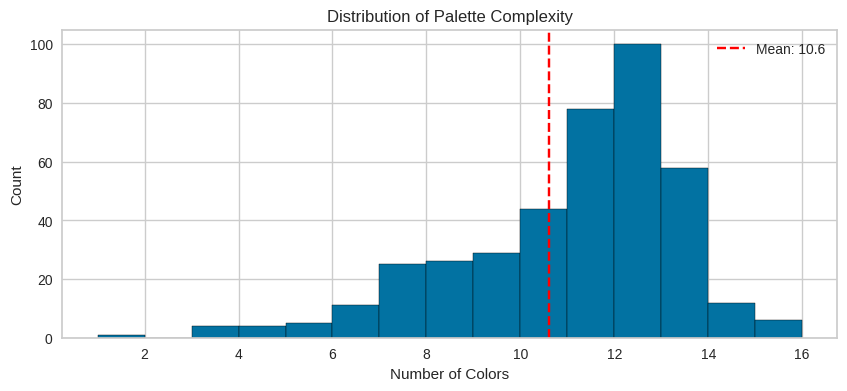

In [232]:
plt.figure(figsize=(10, 4))
plt.hist(df['num_colors'], bins=range(1, 17), edgecolor='black')
plt.axvline(df['num_colors'].mean(), color='red', linestyle='--', label=f"Mean: {round(df['num_colors'].mean(), 1)}")
plt.xlabel('Number of Colors')
plt.ylabel('Count')
plt.title('Distribution of Palette Complexity')
plt.legend()
plt.show()

In [233]:
simple = len(df[df['num_colors'] <= 5])
medium = len(df[(df['num_colors'] > 5) & (df['num_colors'] <= 10)])
complex_p = len(df[df['num_colors'] > 10])

total_paints = len(df)
print("Paintings with: ")
print(f"- 5 or less colors: {simple} ({round((simple/total_paints)*100, 2)}%)")
print(f"- 6-10 colors: {medium} ({round((medium/total_paints)*100, 2)}%)")
print(f"- 10+ colors: {complex_p} ({round((complex_p/total_paints)*100, 2)}%)")
# print(total_paints)

Paintings with: 
- 5 or less colors: 14 (3.47%)
- 6-10 colors: 135 (33.5%)
- 10+ colors: 254 (63.03%)


Most paintings use a lot of colors. Only about 3.5% are minimalist.

## 6. Evolution Over Seasons

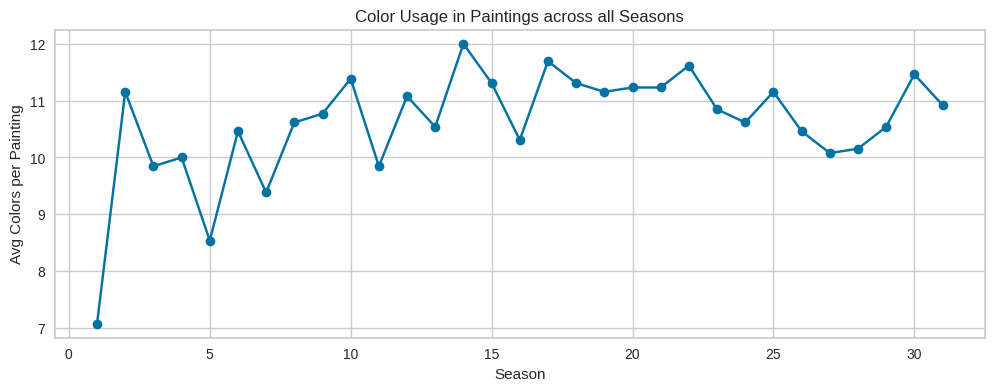

In [234]:
season_avg = df.groupby('season')['num_colors'].mean()

plt.figure(figsize=(12, 4))
plt.plot(season_avg.index, season_avg.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Avg Colors per Painting')
plt.title('Color Usage in Paintings across all Seasons')
plt.show()

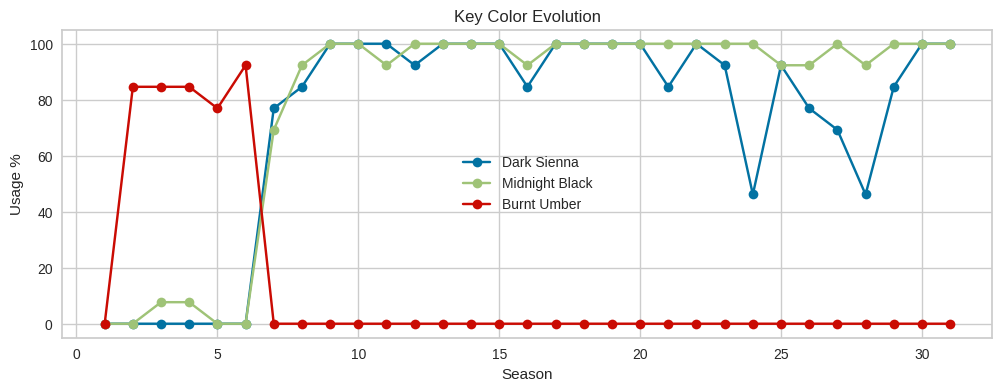

In [235]:
key_colors = ['Dark_Sienna', 'Midnight_Black', 'Burnt_Umber']

plt.figure(figsize=(12, 4))
for color in key_colors:
    usage = df.groupby('season')[color].mean() * 100
    plt.plot(usage.index, usage.values, marker='o', label=color.replace('_', ' '))

plt.xlabel('Season')
plt.ylabel('Usage %')
plt.title('Key Color Evolution')
plt.legend()
plt.show()

In [236]:
early = df[df['season'] <= 10]
late = df[df['season'] >= 22]

print("Early seasons (1–10):")
print(f"- Avg colors: {round(early['num_colors'].mean(), 2)}")
print(f"- Dark Sienna usage: {round(early['Dark_Sienna'].mean() * 100, 2)}%")
print(f"- Burnt Umber usage: {round(early['Burnt_Umber'].mean() * 100, 2)}%")

print("\nLate seasons (22–31):")
print(f"- Avg colors: {round(late['num_colors'].mean(), 2)}")
print(f"- Dark Sienna usage: {round(late['Dark_Sienna'].mean() * 100, 2)}%")
print(f"- Burnt Umber usage: {round(late['Burnt_Umber'].mean() * 100, 2)}%")

Early seasons (1–10):
- Avg colors: 9.92
- Dark Sienna usage: 36.15%
- Burnt Umber usage: 42.31%

Late seasons (22–31):
- Avg colors: 10.78
- Dark Sienna usage: 80.77%
- Burnt Umber usage: 0.0%


There's a clear shift. Burnt Umber basically disappeared after the early seasons while Dark Sienna became almost universal. They seem to be substitutes for each other.

## 7. Color Correlations

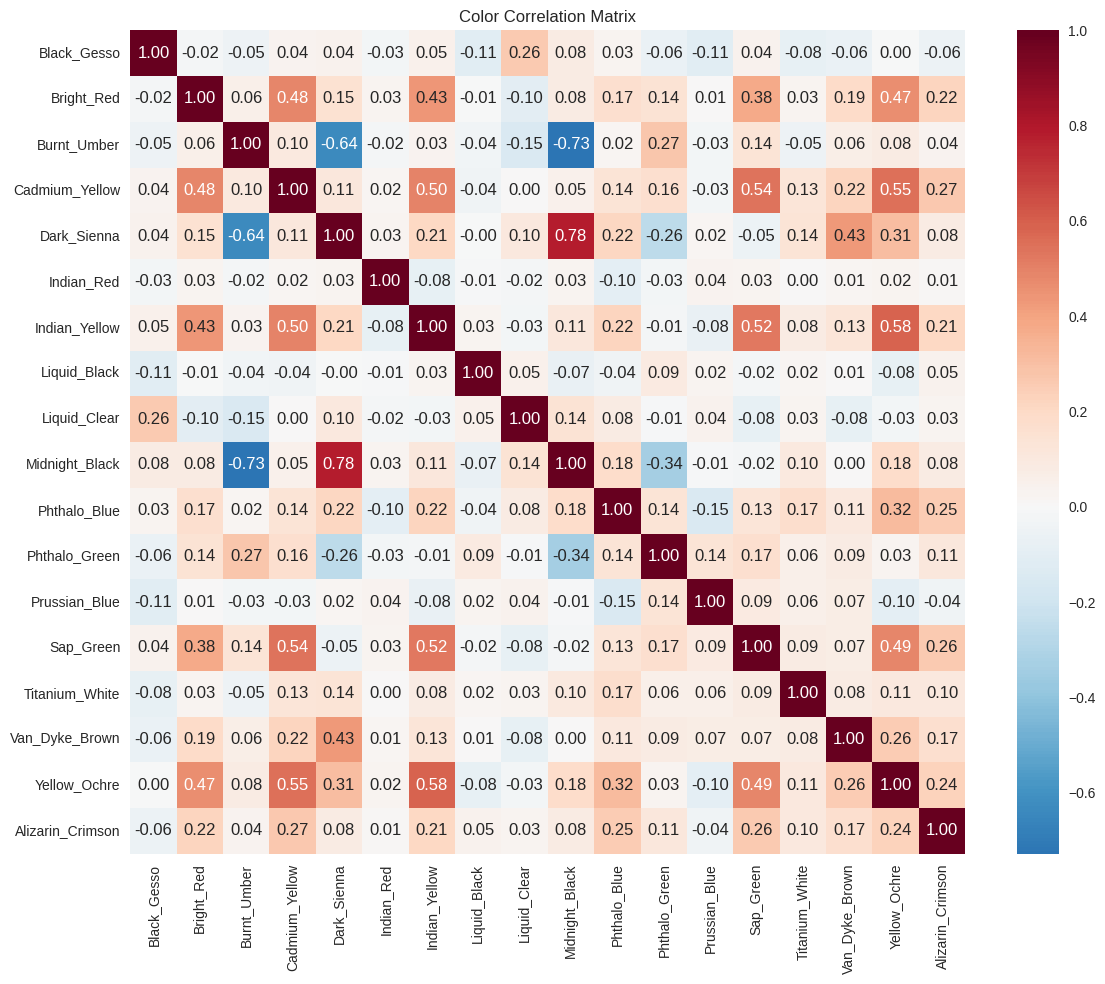

In [237]:
color_corr = df[color_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(color_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Color Correlation Matrix')
plt.tight_layout()
plt.show()

Dark Sienna and Midnight Black are highly correlated (0.78), they're usually used together. Burnt Umber is negatively correlated with both of them, suggesting its a substitute.

## 8. Unique Palettes

In [238]:
df['palette'] = df[color_cols].apply(lambda x: tuple(x), axis=1)
palette_counts = df['palette'].value_counts()

print(f"Total unique palettes: {len(palette_counts)}")
print(f"Paintings with unique palette: {sum(palette_counts == 1)}")
print(f"Most common palette appears: {palette_counts.iloc[0]} times")

Total unique palettes: 176
Paintings with unique palette: 132
Most common palette appears: 46 times


In [239]:
most_common_palette = palette_counts.index[0]
common_colors = [color_cols[i] for i, used in enumerate(most_common_palette) if used]
print(f"Most common palette colors:")
for color in common_colors:
    print("-", color)

Most common palette colors:
- Bright_Red
- Cadmium_Yellow
- Dark_Sienna
- Indian_Yellow
- Midnight_Black
- Phthalo_Blue
- Prussian_Blue
- Sap_Green
- Titanium_White
- Van_Dyke_Brown
- Yellow_Ochre
- Alizarin_Crimson


## Summary

Main findings from the EDA:

1. **Color usage is uneven**: Titanium White (99%), Alizarin Crimson (94%), and Van Dyke Brown (92%) are in almost every painting. Indian Red is in just 1 painting.

2. **Most paintings are complex**: 63% use more than 10 colors. Average is about 10.6.

3. **Style evolved over time**: Burnt Umber was replaced by Dark Sienna + Midnight Black around season 5-10. These colors seem to be substitutes.

4. **Strong color relationships**: Dark Sienna and Midnight Black are highly correlated (r=0.78). Burnt Umber is negatively correlated with both.

5. **Palette reuse is common**: Despite 403 paintings, only 176 unique palettes exist. The most common palette appears 46 times, containing 12 colors.

## Business Questions

1. **Palette Archetypes**: Can we cluster the paintings into distinct palette types, and what characterizes paintings that share identical palettes versus unique ones? Do these clusters align with themes like winter/mountain/water?

2. **Color Rules**: What association rules explain why some colors are never used together (like Burnt Umber with Dark Sienna)?

3. **Core vs. Specialty Colors**: With usage ranging from 0.2% (Indian Red) to 99.3% (Titanium White), can we identify which colors form the essential "core palette" versus situational additions?

## *Question 1 Palettes*


Idea breakdown:

* Can we cluster these paintings into distinct palette types? Do these types lineup with themes we define based on titles?

Attempt 1: Hierarchical clustering with a dendrogram.

* We already have our heatmap defined, drop categorical columns and then create the dendrogram

Attempt 2: Elbow Method

* Using some code from the dendrogram system, will K-means and the elbow method give us a different number of clusters?

## Establish Theme Groupings

This is done through combining elements of the title into our own defined groupings

In [240]:
theme_keywords = {"water": ["lake", "river", "stream", "waterfall", "pond", "ocean", "sea"],
    "winter": ["winter", "snow", "snowy", "frozen"],
    "mountain": ["mountain", "mountains", "peak", "alpine"],
    "forest": ["forest", "woods", "trees"],
    "sky": ["sunset", "dusk", "evening", "sky", "glow"],
    "field": ["meadow", "field", "prairie", "hills"],
    "autumn": ["autumn", "fall"]}

In [241]:
def assign_theme(title):
    title = title.lower()
    for theme, keywords in theme_keywords.items():
        if any(word in title for word in keywords):
            return theme
    return "other"

df["theme"] = df["painting_title"].apply(assign_theme)

## Hierarchical w/ Dendrogram

In [242]:
color_cols = [
    col for col in df.columns
    if col not in [
        'painting_index', 'num_colors', 'episode', 'title', 'season', 'episode_num', 'img_src', 'youtube_src', 'painting_title', 'colors', 'color_hex', 'palette', 'theme'
    ]
]

palette_df = df[color_cols]
palette_df.head()


,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True
1,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True
2,True,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
4,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True


In [243]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
palette_scaled = scaler.fit_transform(palette_df)

In [244]:
from scipy.cluster.hierarchy import linkage

Z = linkage(
    palette_scaled,
    method='ward'
)


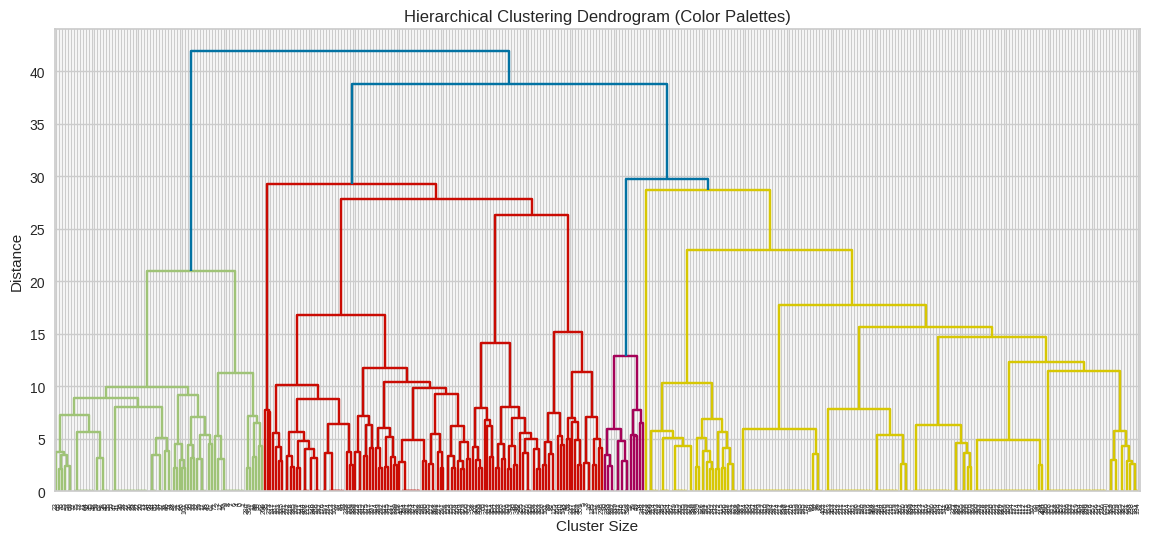

In [261]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    truncate_mode='level'
)

plt.title('Hierarchical Clustering Dendrogram (Color Palettes)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


Dendrogram showcases 5 colored clusters. I initially tested the 5, but wasn't happy with the results. After further analysis I looked and visually saw potentially 9 clusters. After testing this I was happier with the results. See implementation below

In [246]:
#Alter this cell to change the amount of clusters based on the Dendrogram output

dendro_clusters = 9

In [247]:
from scipy.cluster.hierarchy import fcluster

df['palette_cluster_hc'] = fcluster(Z, t=dendro_clusters, criterion='maxclust')

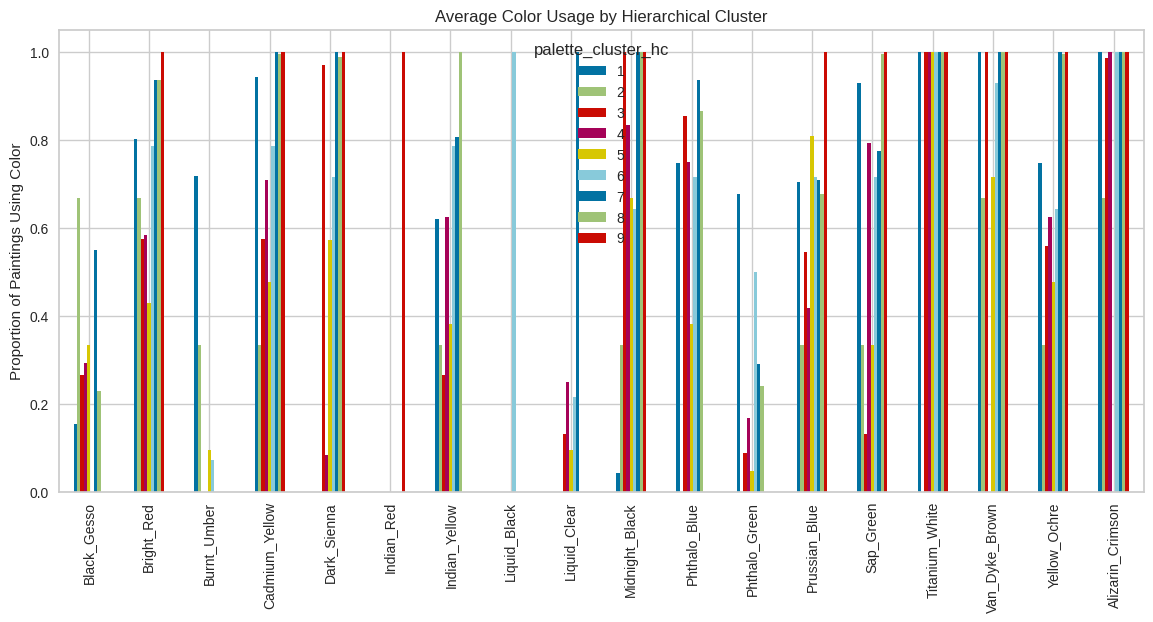

In [248]:
cluster_palette_means = (df.groupby('palette_cluster_hc')[palette_df.columns].mean())

cluster_palette_means.T.plot(kind='bar', figsize=(14, 6))

plt.title('Average Color Usage by Hierarchical Cluster')
plt.ylabel('Proportion of Paintings Using Color')
plt.show()

In [249]:
df['used_colors'] = df[color_cols].apply(lambda row: [color for color in color_cols if row[color]], axis=1)

for cluster_id in sorted(df['palette_cluster_hc'].unique()):
    colors = (df.loc[df['palette_cluster_hc'] == cluster_id, 'used_colors'].explode().unique())
    print(f"Cluster #{cluster_id}:\n {', '.join(sorted(colors))}\n")

Cluster #1:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Indian_Yellow, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Van_Dyke_Brown, Yellow_Ochre

Cluster #2:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Indian_Yellow, Midnight_Black, Prussian_Blue, Sap_Green, Van_Dyke_Brown, Yellow_Ochre

Cluster #3:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Cadmium_Yellow, Dark_Sienna, Indian_Yellow, Liquid_Clear, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Van_Dyke_Brown, Yellow_Ochre

Cluster #4:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Cadmium_Yellow, Dark_Sienna, Indian_Yellow, Liquid_Clear, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Yellow_Ochre

Cluster #5:
 Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Dark_Sienna, Indian_Yellow, Liquid_Clear, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Bl

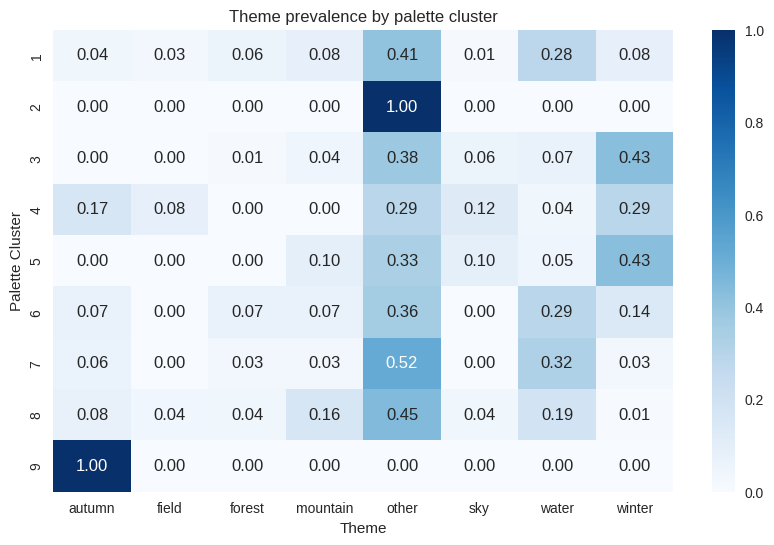

In [250]:
theme_by_cluster = pd.crosstab(df["palette_cluster_hc"], df["theme"], normalize="index")

plt.figure(figsize=(10, 6))
sns.heatmap(theme_by_cluster, annot=True, cmap="Blues", fmt=".2f")
plt.title("Theme prevalence by palette cluster")
plt.ylabel("Palette Cluster")
plt.xlabel("Theme")
plt.show()


Heatmap showcases no real correlation amongst the clusters and painting themes. The 0.4 in winter is the highest value but it is not high enough to validate our question of themes and colors. Based on this output there does not seem to be heavy correlation between these clusters and painting themes.

In [251]:
#This is used to inspect a particular cluster and see the painting title, season, and episode to understand the cluster better.

cluster_id = 4

color_cols = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
              'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']

df['used_colors'] = df[color_cols].apply(
    lambda row: [color for color in color_cols if row[color]],
    axis=1)

df['palette_cluster_hc'].value_counts().sort_index()

df.loc[
    df['palette_cluster_hc'] == cluster_id,
    ['painting_title', 'season', 'episode', 'used_colors']
].head(15)


,painting_title,season,episode,used_colors
60,Anatomy of a Wave,5,9,"[Cadmium_Yellow, Liquid_Clear, Phthalo_Blue, P..."
80,Evergreens at Sunset,7,3,"[Bright_Red, Cadmium_Yellow, Indian_Yellow, Mi..."
82,Portrait of Sally,7,5,"[Bright_Red, Cadmium_Yellow, Dark_Sienna, Indi..."
88,Grey Winter,7,11,"[Midnight_Black, Titanium_White, Alizarin_Crim..."
255,Winter Paradise,20,9,"[Dark_Sienna, Midnight_Black, Phthalo_Blue, Pr..."
270,Desert Glow,21,11,"[Bright_Red, Cadmium_Yellow, Indian_Yellow, Mi..."
301,Teton Winter,24,3,"[Midnight_Black, Phthalo_Blue, Prussian_Blue, ..."
302,Little Home in the Meadow,24,4,"[Black_Gesso, Bright_Red, Cadmium_Yellow, Indi..."
303,A Pretty Autumn Day,24,5,"[Black_Gesso, Bright_Red, Cadmium_Yellow, Indi..."
305,Back-Country Path,24,7,"[Black_Gesso, Bright_Red, Cadmium_Yellow, Indi..."


## K-Means w/ Elbow Method

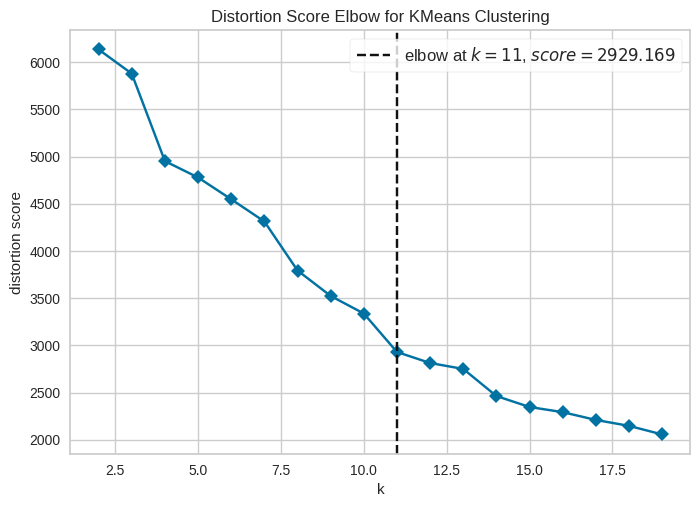

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [252]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric='distortion', timings=False, random_state=42
)

visualizer.fit(palette_scaled)
visualizer.show()

Graph showcases the optimal number of clusters is 11. Implemented below

In [253]:
#Alter this cell to change the amount of clusters based on the Dendrogram output
elbow_clusters = 11

In [254]:
from scipy.cluster.hierarchy import fcluster

df['palette_cluster_hc'] = fcluster(Z, t=elbow_clusters, criterion='maxclust')

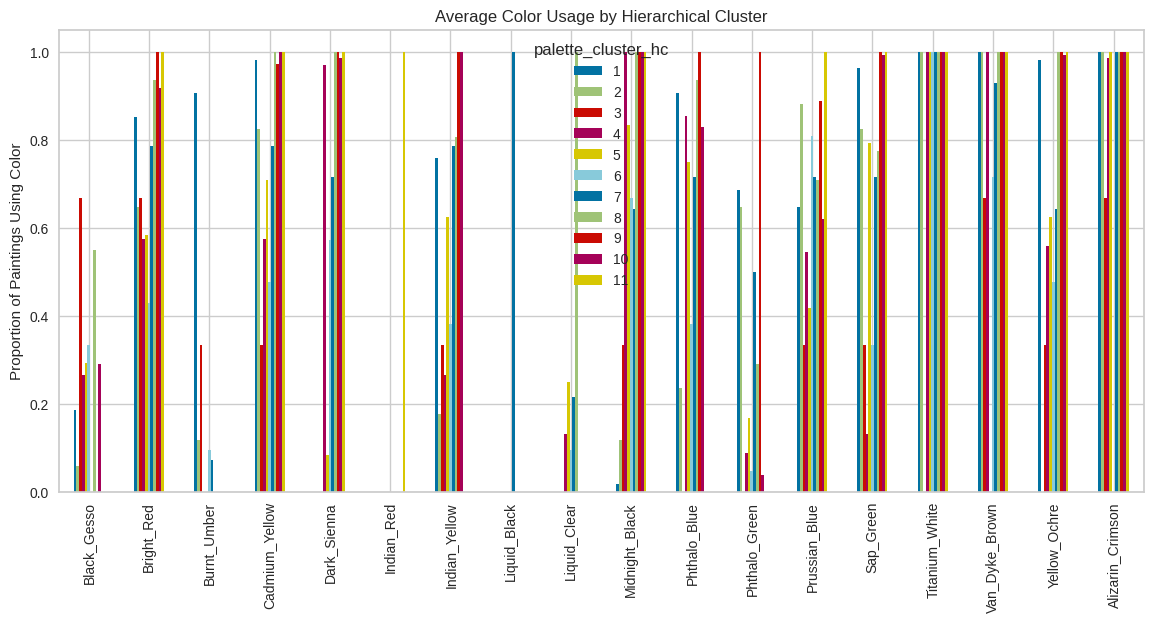

In [255]:
cluster_palette_means = (
    df
    .groupby('palette_cluster_hc')[palette_df.columns]
    .mean()
)

cluster_palette_means.T.plot(
    kind='bar',
    figsize=(14, 6)
)

plt.title('Average Color Usage by Hierarchical Cluster')
plt.ylabel('Proportion of Paintings Using Color')
plt.show()


In [256]:
df['used_colors'] = df[color_cols].apply(lambda row: [color for color in color_cols if row[color]], axis=1)

for cluster_id in sorted(df['palette_cluster_hc'].unique()):
    colors = (df.loc[df['palette_cluster_hc'] == cluster_id, 'used_colors'].explode().unique())
    print(f"Cluster #{cluster_id}:\n {', '.join(sorted(colors))}\n")

Cluster #1:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Indian_Yellow, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Van_Dyke_Brown, Yellow_Ochre

Cluster #2:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Indian_Yellow, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Van_Dyke_Brown

Cluster #3:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Burnt_Umber, Cadmium_Yellow, Indian_Yellow, Midnight_Black, Prussian_Blue, Sap_Green, Van_Dyke_Brown, Yellow_Ochre

Cluster #4:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Cadmium_Yellow, Dark_Sienna, Indian_Yellow, Liquid_Clear, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap_Green, Titanium_White, Van_Dyke_Brown, Yellow_Ochre

Cluster #5:
 Alizarin_Crimson, Black_Gesso, Bright_Red, Cadmium_Yellow, Dark_Sienna, Indian_Yellow, Liquid_Clear, Midnight_Black, Phthalo_Blue, Phthalo_Green, Prussian_Blue, Sap

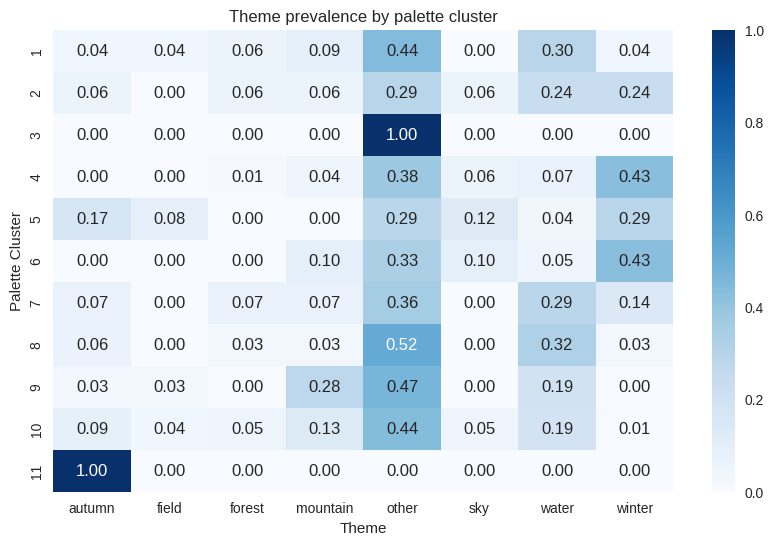

In [257]:
theme_by_cluster = pd.crosstab(df["palette_cluster_hc"], df["theme"], normalize="index")

plt.figure(figsize=(10, 6))
sns.heatmap(theme_by_cluster, annot=True, cmap="Blues", fmt=".2f")
plt.title("Theme prevalence by palette cluster")
plt.ylabel("Palette Cluster")
plt.xlabel("Theme")
plt.show()


This heatmap performed much better than the dendrogram. While we still see one category in the 'other' category has a score of 1.0. We now see cluster 11 has a 1.0 score in the 'autumn' category. After further inspection (see below) We see only one painting in this cluster explaining the 1.0. While this does provide a yes answer to our original question 1 painting is too much of an outlier. Further analysis needs to be done to see if we can answer our question.

In [258]:
#This is used to inspect a particular cluster and see the painting title, season, and episode to understand the cluster better.

cluster_id = 11

color_cols = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
              'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']

df['used_colors'] = df[color_cols].apply(
    lambda row: [color for color in color_cols if row[color]],
    axis=1)

df['palette_cluster_hc'].value_counts().sort_index()

df.loc[
    df['palette_cluster_hc'] == cluster_id,
    ['painting_title', 'season', 'episode', 'used_colors']
].head(15)


,painting_title,season,episode,used_colors
273,Autumn Images,22,1,"[Bright_Red, Cadmium_Yellow, Dark_Sienna, Indi..."
